---
## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial import distance
from sklearn.metrics import jaccard_score
import matplotlib

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 7]

---
## Read the Dataset

In [2]:
netflix = pd.read_csv("data/netflix_titles.csv", delimiter=",")
imdb = pd.read_csv("data/IMDb movies.csv", low_memory=False, delimiter=",")

## Ερωτήματα

---
### 1. 
There are more movies, than TV Shows.

Movie      5377
TV Show    2410
Name: type, dtype: int64


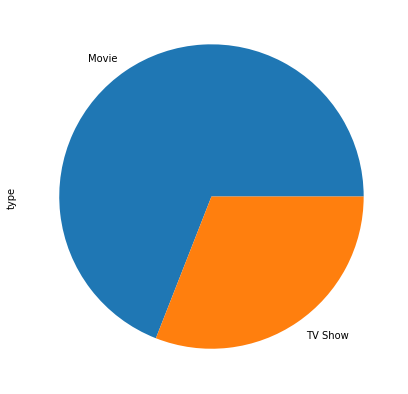

In [3]:
def ex_1():
    item_counts = netflix['type'].value_counts()

    print(item_counts)

    item_counts.plot(kind='pie')

ex_1()

---
### 2. 
Change the num_of_years variable, to get different results.

This are the data for the last 5 years.
Movie      5016
TV Show    2173
Name: type, dtype: int64


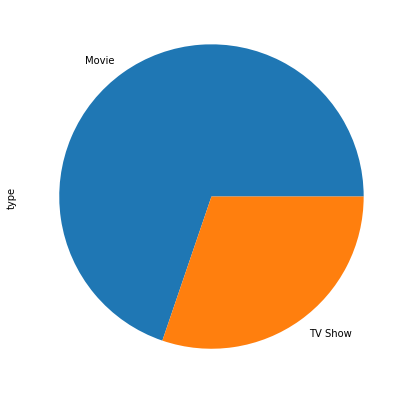

In [4]:
def ex_2():
    from datetime import date

    # Change this to show a the results from a different number of years.
    num_of_years = 5
    min_release_year = date.today().year - num_of_years

    # We DatetimeIndex extracts the year from the date.
    latest_media_netflix = netflix[pd.DatetimeIndex(netflix['date_added']).year > min_release_year]

    latest_item_counts = latest_media_netflix['type'].value_counts()

    print("This are the data for the last", num_of_years, "years.")
    print(latest_item_counts)

    latest_item_counts.plot(kind='pie')

ex_2()

---
### 3. 
United States was the country with the most media.

In [5]:
def ex_3():
    import operator

    countries_media_counter = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']

        # Don't allow nan values.
        if countries == countries:

            # Split in case of multiple countries.
            countries = countries.split(", ")

            for country in countries:
                countries_media_counter[country] = countries_media_counter.setdefault(country, 0) + 1

    country_with_most_media = max(countries_media_counter.items(), key = operator.itemgetter(1))[0]
    print("The country with the most media was: ", country_with_most_media)

ex_3()

The country with the most media was:  United States


---
### 4
Change the country_to_check variable, to get different results.

In [6]:
def ex_4():
    countries_genre = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']
        genres = row[1]['listed_in']

        # Don't allow nan values.
        if countries != countries or genres != genres:
            continue

        # Split, in case of multiple data.
        countries = countries.split(", ")
        genres = genres.split(", ")

        # Loop through countries and genres.
        # Only add a genre into the dictionary if it doesn't exist.
        for country in countries:
            for genre in genres:
                if country in countries_genre:
                    if genre not in countries_genre[country]:
                        countries_genre[country].append(genre)
                else:
                    countries_genre[country] = [genre]
    
    # Change this to get results from a different country.
    country_to_check = "Greece"

    print(country_to_check, " has this genres: ", countries_genre[country_to_check])

ex_4()

Greece  has this genres:  ['British TV Shows', 'Docuseries', 'International TV Shows', 'Movies', 'Dramas', 'Independent Movies', 'Action & Adventure', 'Sci-Fi & Fantasy', 'Documentaries', 'LGBTQ Movies', 'Comedies', 'International Movies', 'Romantic Movies', 'Science & Nature TV']


---
### 5. 
Change the selected_country and num_of_actors variables, to get different results.

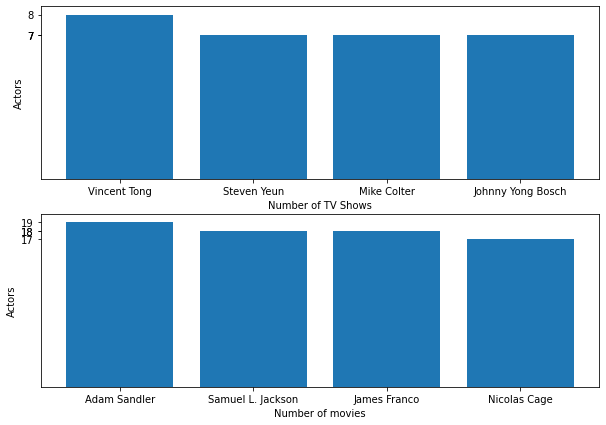

In [7]:
def ex_5():
    countries_actors_tv_shows = dict()
    countries_actors_movies = dict()

    for row in netflix.iterrows():

        countries = row[1]['country']
        actors = row[1]['cast']

        if countries != countries or actors != actors:
            continue

        # Split, in case of multiple data.
        countries = countries.split(", ")
        actors = actors.split(", ")

        # If countries_media gets updated,
        # countries_actors_tv_shows or countries_actors_movies,
        # will get updated too.
        if row[1]['type'] == "TV Show":
            countries_media = countries_actors_tv_shows
        elif row[1]['type'] == "Movie":
            countries_media = countries_actors_movies

        for country in countries:
            for actor in actors:
                if country in countries_media:
                    found = False

                    for key in countries_media[country]:
                        if key[1] == actor:
                            key[0] += 1
                            found = True
                            break
                    
                    if found == False:
                        countries_media[country].append([1, actor])
                
                else:
                    countries_media[country] = [[1, actor]]

    # Change this to select a different country.
    selected_country = "United States"
    # Change this to select a different number of actors to be shown.
    num_of_actors = 4

    # Get only the date we need.
    selected_countries_actors_movies = countries_actors_movies[selected_country]
    selected_countries_actors_movies.sort(reverse=True)
    selected_countries_actors_movies = selected_countries_actors_movies[:num_of_actors]

    selected_countries_actors_tv_shows = countries_actors_tv_shows[selected_country]
    selected_countries_actors_tv_shows.sort(reverse=True)
    selected_countries_actors_tv_shows = selected_countries_actors_tv_shows[:num_of_actors]

    tv_shows_ys, tv_shows_labels = zip(*selected_countries_actors_tv_shows)
    tv_shows_xs = np.arange(len(tv_shows_labels)) 

    plt.subplot(2, 1, 1)
    plt.bar(tv_shows_xs, tv_shows_ys)

    plt.xticks(tv_shows_xs, tv_shows_labels)
    plt.yticks(tv_shows_ys)

    movies_ys, movies_labels = zip(*selected_countries_actors_movies)
    movies_xs = np.arange(len(movies_labels))

    plt.xlabel("Number of TV Shows")
    plt.ylabel("Actors")

    plt.subplot(2, 1, 2)

    plt.bar(movies_xs, movies_ys)

    plt.xticks(movies_xs, movies_labels)
    plt.yticks(movies_ys)

    plt.xlabel("Number of movies")
    plt.ylabel("Actors")

    plt.show()

ex_5()

---
### 6.

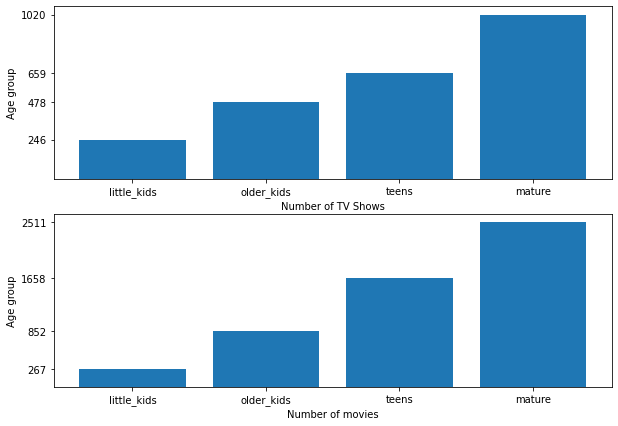

In [8]:
def ex_6():
    alias = {
    'G': 'little_kids', 'TV-Y': 'little_kids', 'TV-G': 'little_kids',
    'PG': 'older_kids', 'TV-Y7': 'older_kids', 'TV-Y7-FV': 'older_kids', 'TV-PG':'older_kids',
    'PG-13': 'teens', 'TV-14': 'teens',
    'R': 'mature', 'NC-17': 'mature', 'TV-MA': 'mature'
    }

    ratings_counter_tv_shows = {
        'little_kids': 0, 'older_kids': 0, 'teens': 0, 'mature': 0,
    }

    ratings_counter_movies = {
        'little_kids': 0, 'older_kids': 0, 'teens': 0, 'mature': 0,
    }

    for row in netflix.iterrows():

        rating = row[1]['rating']

        # Skip unknown ratings
        if rating not in alias:
            continue

        # If ratings_media gets updated,
        # ratings_tv_shows or ratings_movies,
        # will get updated too.
        if row[1]['type'] == "TV Show":
            ratings_media = ratings_counter_tv_shows
        elif row[1]['type'] == "Movie":
            ratings_media = ratings_counter_movies
        
        ratings_media[alias[rating]] += 1

    tv_shows_labels, tv_shows_ys = zip(*ratings_counter_tv_shows.items())
    tv_shows_xs = np.arange(len(tv_shows_labels)) 

    plt.subplot(2, 1, 1)
    plt.bar(tv_shows_xs, tv_shows_ys)

    plt.xticks(tv_shows_xs, tv_shows_labels)
    plt.yticks(tv_shows_ys)

    movies_labels, movies_ys = zip(*ratings_counter_movies.items())
    movies_xs = np.arange(len(movies_labels))

    plt.xlabel("Number of TV Shows")
    plt.ylabel("Age group")

    plt.subplot(2, 1, 2)

    plt.bar(movies_xs, movies_ys)

    plt.xticks(movies_xs, movies_labels)
    plt.yticks(movies_ys)

    plt.xlabel("Number of movies")
    plt.ylabel("Age group")

    plt.show()

ex_6()

## Recommendation System

### 1.a

In [52]:
# Create a Vectorizer Object
stopwords = ['the','of','a','and','to','in','on','as','an','for','is']
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english', binary=True, max_df=0.8, min_df=2, strip_accents='ascii')

descriptions = netflix[netflix['type'] == 'Movie']['description'].tolist()
titles = netflix[netflix['type'] == 'Movie']['title'].tolist()
ids = netflix[netflix['type'] == 'Movie']['show_id'].tolist()

description_bow = vectorizer.fit_transform(descriptions).toarray()
title_bow = vectorizer.fit_transform(titles).toarray()

all_bow = dict()

def foo():

    counter = 0

    for i in range(len(ids)):
        all_bow[ids[i]] = []

        for j in range(len(ids)):

            if counter == 10000:
                return
            counter += 1

            if i == j:
                continue

            all_bow[ids[i]].append([jaccard_score(description_bow[i], description_bow[j]), ids[j]])
    
foo()

# print("Description:", jaccard_score(description_bow[id_1], description_bow[id_2]))
# print("Title:", jaccard_score(title_bow[id_1], title_bow[id_2]))
# print(distance.cdist(arr[0], arr[1], metric='jaccard'))

In [31]:
print(description_bow.shape)
print(title_bow.shape)

# print(len(all_bow['s612']))

(5377, 11472)
(5377, 2120)


### 3

In [72]:
def get_similar_movies1(title, n, method):
    index = netflix.index[netflix['title'] == title].tolist()
    
get_similar_movies1('Austin Powers in Goldmember', 1, 3)

[625]
